In [165]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [166]:
n_actions = 10
action_rewards = np.array(range(1, n_actions + 1))

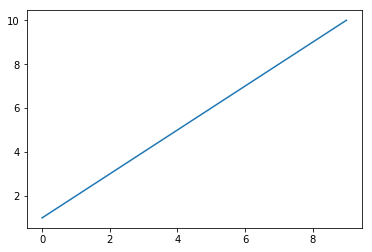

In [167]:
plt.plot(action_rewards)

tensor([0.1818, 0.1636, 0.1455, 0.1273, 0.1091, 0.0909, 0.0727, 0.0545, 0.0364,
        0.0182])


<BarContainer object of 10 artists>

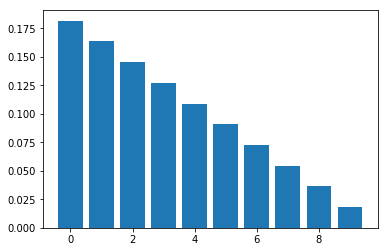

In [359]:
beta_policy = torch.as_tensor((11 - np.arange(1, n_actions+1)) / 55, dtype=torch.float)
print(beta_policy)
plt.bar(range(n_actions), beta_policy.numpy())

0 tensor(17.4014, grad_fn=<NegBackward>) tensor([0.6058, 0.2253, 0.8547, 0.8079, 0.7937, 0.2824, 0.0986, 0.6131, 0.8863,
        0.7992])
10 tensor(11.4955, grad_fn=<NegBackward>) tensor([ 0.1749, -0.0430,  0.4734,  0.5572,  0.5784,  0.2364,  0.1235,  0.7399,
         1.2704,  1.8559])
20 tensor(3.3941, grad_fn=<NegBackward>) tensor([-0.0719, -0.2035,  0.2535,  0.3903,  0.4148,  0.2002,  0.0059,  0.7289,
         0.8740,  3.3750])
30 tensor(4.6787, grad_fn=<NegBackward>) tensor([-0.2015, -0.3107,  0.1034,  0.2324,  0.3010,  0.1196, -0.0539,  0.5771,
         0.8575,  4.3420])
40 tensor(2.4898, grad_fn=<NegBackward>) tensor([-2.9015e-01, -3.8652e-01,  3.2695e-03,  1.1657e-01,  2.0374e-01,
         5.6033e-02, -8.8347e-02,  5.0937e-01,  7.7419e-01,  5.0689e+00])
50 tensor(2.6864, grad_fn=<NegBackward>) tensor([-0.3224, -0.4129, -0.0303,  0.0880,  0.1802,  0.0504, -0.1064,  0.5155,
         0.7854,  5.2196])
60 tensor(1.1006, grad_fn=<NegBackward>) tensor([-0.3681, -0.4522, -0.0831,  0.03

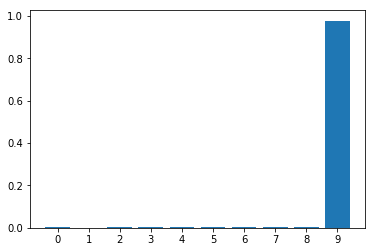

In [357]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 100
batch_size = 50
lr = 1e-1
loss_steps = []
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    loss = -torch.mean(tgt_policy.detach()[actions] * rewards * torch.log(tgt_policy[actions]) / beta_policy[actions])
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));

0 tensor(9.2009, grad_fn=<NegBackward>) tensor([0.9691, 0.1070, 0.9315, 0.6111, 0.4552, 0.5978, 0.3458, 0.3990, 0.9472,
        0.8399])
10 tensor(9.1147, grad_fn=<NegBackward>) tensor([0.6997, 0.2034, 0.8423, 0.7012, 0.6955, 0.7472, 0.4356, 0.4668, 0.8182,
        0.5938])
20 tensor(10.3756, grad_fn=<NegBackward>) tensor([0.5190, 0.2441, 0.7148, 0.7769, 0.8129, 0.8834, 0.7296, 0.5731, 0.5881,
        0.3618])
30 tensor(9.2096, grad_fn=<NegBackward>) tensor([0.3453, 0.2569, 0.7388, 0.7430, 0.8184, 0.9218, 0.9239, 0.7182, 0.4516,
        0.2857])
40 tensor(8.8996, grad_fn=<NegBackward>) tensor([0.2228, 0.2967, 0.7304, 0.8080, 0.9293, 0.9982, 0.8504, 0.7454, 0.5179,
        0.1045])
50 tensor(7.2662, grad_fn=<NegBackward>) tensor([0.1439, 0.3183, 0.7249, 0.7883, 1.0442, 0.9367, 0.7442, 0.7847, 0.6541,
        0.0644])
60 tensor(8.3631, grad_fn=<NegBackward>) tensor([0.1070, 0.4289, 0.6904, 0.7833, 1.0272, 0.9991, 0.7144, 0.8132, 0.5303,
        0.1098])
70 tensor(9.0350, grad_fn=<NegBack

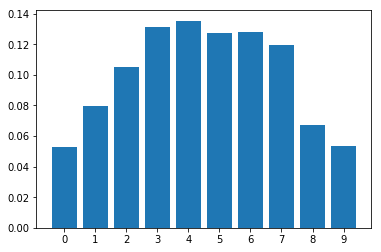

In [360]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 100
batch_size = 50
lr = 1e-1
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    loss = -torch.mean(rewards * torch.log(tgt_policy[actions]))
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));